In [63]:
import numpy as np
from astropy.io import fits
from astropy import stats
from astropy import time
import matplotlib.pyplot as plt
import astropy.time as astt
import glob

In [64]:
def get_level_exptime_for_file (fitsfilename, minx=1000,maxx=1050,miny=1000,maxy=1050):
    f = fits.open(fitsfilename)
    data = f[0].data[1][miny:maxy,minx:maxx]
    exptime = float(f[0].header['EXPTIME'] )
    dateobs = f[0].header['DATE-OBS']
    dateobst = astt.Time(dateobs, scale='utc', format=None).to_datetime()
    level = np.median (data)
    std = np.std(data)
    level = np.average ( data [ np.abs(data-level) < 4*std])
    f.close()
    del data
    return exptime, level, dateobst

/Users/dharbeck/lco/cosmos/MIT/HSHG_GS/Darks/HighSHighG_GS_raw_2400ms_SC 2024 May 02 15_07_42.fits 2400.0 100.66973947895792 2024-05-02 19:08:07
/Users/dharbeck/lco/cosmos/MIT/HSHG_GS/Darks/HighSHighG_GS_raw_4000ms_SC 2024 May 02 15_11_52.fits 4000.0 100.9318364073777 2024-05-02 19:12:33
/Users/dharbeck/lco/cosmos/MIT/HSHG_GS/Darks/HighSHighG_GS_raw_1us_SC 2024 May 02 14_59_11.fits 0.001 99.00080160320641 2024-05-02 18:59:30
/Users/dharbeck/lco/cosmos/MIT/HSHG_GS/Darks/HighSHighG_GS_raw_800ms_SC 2024 May 02 15_03_19.fits 800.0 100.55084067253803 2024-05-02 19:03:27
/Users/dharbeck/lco/cosmos/MIT/HSHG_GS/Darks/HighSHighG_GS_raw_100ms_SC 2024 May 02 15_00_26.fits 100.0 99.00320769847634 2024-05-02 19:00:29
/Users/dharbeck/lco/cosmos/MIT/HSHG_GS/Darks/HighSHighG_GS_raw_1200ms_SC 2024 May 02 15_05_11.fits 1200.0 99.8041649979976 2024-05-02 19:05:24
/Users/dharbeck/lco/cosmos/MIT/HSHG_GS/Darks/HighSHighG_GS_raw_400ms_SC 2024 May 02 15_01_43.fits 400.0 100.74899759422614 2024-05-02 19:01:48


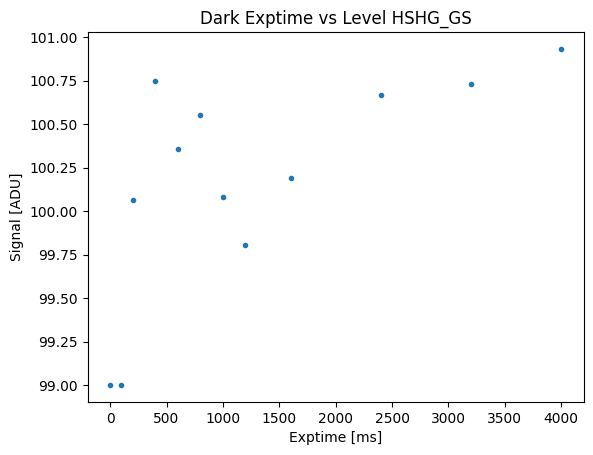

In [65]:
darkfiles  = "/Users/dharbeck/lco/cosmos/MIT/HSHG_GS/Darks/*.fits"
dark_texp = []
dark_level = []
for dark in glob.glob(darkfiles):
    exptime, level, dateobs = get_level_exptime_for_file(dark)
    print (dark,exptime, level, dateobs)
    dark_texp.append (exptime)
    dark_level.append (level)
dark_texp = np.asarray(dark_texp)
dark_level = np.asarray(dark_level)

plt.figure()
plt.plot (dark_texp,dark_level, '.')
plt.xlabel ('Exptime [ms]')
plt.ylabel ("Signal [ADU]")
plt.title ("Dark Exptime vs Level HSHG_GS")
plt.show()

/Users/dharbeck/lco/cosmos/MIT/HSHG_GS/Flats/HighSHighG_GS_raw_600ms_SO 2024 May 02 15_02_53.fits 600.0 2804.8172 2024-05-02 19:02:59
/Users/dharbeck/lco/cosmos/MIT/HSHG_GS/Flats/HighSHighG_GS_raw_3200ms_SO 2024 May 02 15_10_26.fits 3200.0 15040.2412 2024-05-02 19:10:59
/Users/dharbeck/lco/cosmos/MIT/HSHG_GS/Flats/HighSHighG_GS_raw_400ms_SO 2024 May 02 15_02_07.fits 400.0 1843.7848 2024-05-02 19:02:12
/Users/dharbeck/lco/cosmos/MIT/HSHG_GS/Flats/HighSHighG_GS_raw_2400ms_SO 2024 May 02 15_08_23.fits 2400.0 11800.4636 2024-05-02 19:08:48
/Users/dharbeck/lco/cosmos/MIT/HSHG_GS/Flats/HighSHighG_GS_raw_1000ms_SO 2024 May 02 15_04_41.fits 1000.0 4767.9064 2024-05-02 19:04:51
/Users/dharbeck/lco/cosmos/MIT/HSHG_GS/Flats/HighSHighG_GS_raw_100ms_SO 2024 May 02 15_00_42.fits 100.0 452.982 2024-05-02 19:00:44
/Users/dharbeck/lco/cosmos/MIT/HSHG_GS/Flats/HighSHighG_GS_raw_1200ms_SO 2024 May 02 15_05_37.fits 1200.0 5763.8804 2024-05-02 19:05:50
/Users/dharbeck/lco/cosmos/MIT/HSHG_GS/Flats/HighSHigh

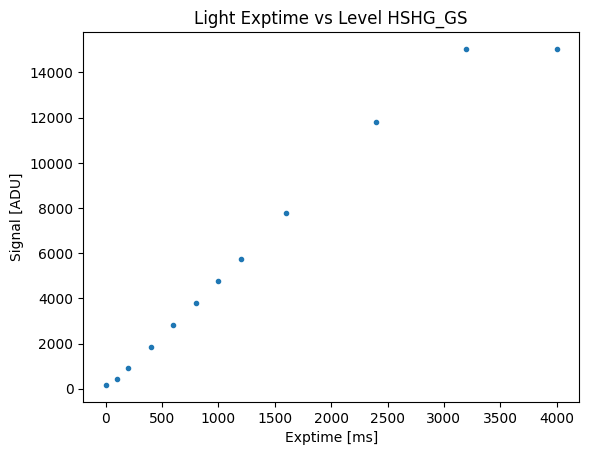

In [66]:
lightfiles  = "/Users/dharbeck/lco/cosmos/MIT/HSHG_GS/Flats/*.fits"
light_texp = []
light_level = []
for light in glob.glob(lightfiles):
    exptime, level, dateobs = get_level_exptime_for_file(light)
    print (light,exptime, level, dateobs)
    light_texp.append (exptime)
    light_level.append (level)
light_texp = np.asarray(light_texp)
light_level = np.asarray(light_level)

plt.figure()
plt.plot (light_texp,light_level, '.')
plt.title ("Light Exptime vs Level HSHG_GS")
plt.xlabel ('Exptime [ms]')
plt.ylabel ("Signal [ADU]")
plt.show()

0 2704.4605146517215 2804.8172 100.35668534827862
1 14939.509307242897 15040.2412 100.73189275710284
2 1743.0358024057737 1843.7848 100.74899759422614
3 11699.793860521042 11800.4636 100.66973947895792
4 4667.824767346939 4767.9064 100.08163265306122
5 353.9787923015237 452.982 99.00320769847634
6 5664.076235002002 5763.8804 99.8041649979976
7 71.86719839679358 170.868 99.00080160320641
8 3679.082759327462 3779.6336 100.55084067253803
9 7669.762229791837 7769.949979991997 100.18775020016012
10 14937.595363592623 15038.5272 100.9318364073777
11 808.367245575585 908.4305722288916 100.06332665330662


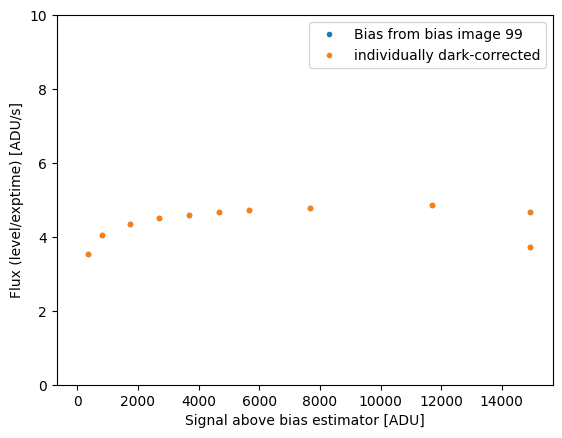

In [70]:
biaslevel=99
corrected_light = light_level * 1.
for ii in range (len(light_texp)):
    texp = light_texp[ii]
    dindex = np.where (dark_texp == texp)[0][0]
    corrected_light[ii] = light_level[ii] - dark_level[dindex]
    print (   ii,  corrected_light[ii],light_level[ii], dark_level[dindex] )

plt.figure()
plt.plot ( (light_level-biaslevel), (light_level-biaslevel) / light_texp,'.', label=f"Bias from bias image {biaslevel}")
plt.plot (corrected_light, (corrected_light) / light_texp,'.', label=f"individually dark-corrected")

plt.legend()
plt.xlabel("Signal above bias estimator [ADU]")
plt.ylabel ("Flux (level/exptime) [ADU/s]")
plt.ylim(0,10)
plt.savefig ("flux_mit_time.png")

In [78]:
a = np.asarray((1,2,3))
b = a
print (a)
print (b)

a[1] = 10
print (a)
print (b)

print ("Now with arithmetic in between")
a = np.asarray((1,2,3))
b = a*1
print (a)
print (b)

a[1] = 10
print (a)
print (b)



[1 2 3]
[1 2 3]
[ 1 10  3]
[ 1 10  3]
Now with arithmetic in between
[1 2 3]
[1 2 3]
[ 1 10  3]
[1 2 3]
